### Python pandas library - storing and manipulating data in "dataframes" (tables)

In [11]:
import pandas as pd

In [12]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = IB.open if IB else open

### Reading from CSV file into dataframe

In [13]:
f = open('Cities.csv',newline='')
cities = pd.read_csv(f)

In [14]:
cities

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62
...,...,...,...,...,...
208,Yevpatoriya,Ukraine,45.20,33.36,10.02
209,Zaragoza,Spain,41.65,-0.89,14.17
210,Zhytomyr,Ukraine,50.25,28.66,6.67
211,Zonguldak,Turkey,41.43,31.78,10.64


In [15]:
# Number of rows
len(cities)

213

In [16]:
# First few rows
cities.head(15)

,city,country,latitude,longitude,temperature
0,Aalborg,Denmark,57.03,9.92,7.52
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
2,Abisko,Sweden,63.35,18.83,0.20
3,Adana,Turkey,36.99,35.32,18.67
4,Albacete,Spain,39.00,-1.87,12.62
5,Algeciras,Spain,36.13,-5.47,17.38
6,Amiens,France,49.90,2.30,10.17
7,Amsterdam,Netherlands,52.35,4.92,8.93
8,Ancona,Italy,43.60,13.50,13.52
9,Andorra,Andorra,42.50,1.52,9.60


In [17]:
# Last 20 rows
cities.tail(20)

,city,country,latitude,longitude,temperature
193,Tartu,Estonia,58.38,26.71,4.36
194,Tekirdag,Turkey,40.99,27.51,13.02
195,Toulouse,France,43.62,1.45,10.25
196,Trabzon,Turkey,40.98,39.72,10.28
197,Trieste,Italy,45.65,13.80,11.21
198,Trikala,Greece,39.56,21.77,16.00
199,Trondheim,Norway,63.42,10.42,4.53
200,Turku,Finland,60.45,22.25,4.72
201,Uppsala,Sweden,59.86,17.64,4.17
202,Valencia,Spain,39.49,-0.40,16.02


### Sorting, selecting rows and columns

In [18]:
# Sorting by country then descending temperature
cities.sort_values(['country','temperature'],ascending=[True,False])

,city,country,latitude,longitude,temperature
78,Elbasan,Albania,41.12,20.08,15.18
9,Andorra,Andorra,42.50,1.52,9.60
203,Vienna,Austria,48.20,16.37,7.86
95,Graz,Austria,47.08,15.41,6.91
125,Linz,Austria,48.32,14.29,6.79
...,...,...,...,...,...
41,Bradford,United Kingdom,53.80,-1.75,8.39
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
106,Inverness,United Kingdom,57.47,-4.23,8.00
76,Edinburgh,United Kingdom,55.95,-3.22,7.43


In [19]:
# Selecting a single column - returns a 'series'
cities.city
# Also show cities['city'], cities['temperature'], cities.temperature
cities['city']
cities['temperature']
cities.temperature

0       7.52
1       8.10
2       0.20
3      18.67
4      12.62
       ...  
208    10.02
209    14.17
210     6.67
211    10.64
212     6.68
Name: temperature, Length: 213, dtype: float64

In [20]:
# Selecting multiple columns - returns a dataframe
cities[['city','temperature']]
# Also show cities[['city']]
cities[['city']]

,city
0,Aalborg
1,Aberdeen
2,Abisko
3,Adana
4,Albacete
...,...
208,Yevpatoriya
209,Zaragoza
210,Zhytomyr
211,Zonguldak


In [21]:
# Selecting rows based on condition
# Note: no need to do type conversion - pandas infers types for columns
cities[cities.longitude < 0]

,city,country,latitude,longitude,temperature
1,Aberdeen,United Kingdom,57.17,-2.08,8.10
4,Albacete,Spain,39.00,-1.87,12.62
5,Algeciras,Spain,36.13,-5.47,17.38
10,Angers,France,47.48,-0.53,10.98
17,Badajoz,Spain,38.88,-6.97,15.61
24,Belfast,United Kingdom,54.60,-5.96,8.48
32,Bilbao,Spain,43.25,-2.93,11.41
33,Birmingham,United Kingdom,52.47,-1.92,8.81
34,Blackpool,United Kingdom,53.83,-3.05,9.15
38,Bordeaux,France,44.85,-0.60,11.87


In [22]:
# Selecting rows by number
cities[15:20]
# Show cities[:8] and cities[200:]
a = cities[:8]
b = cities[200:]
print(a, b)

        city         country  latitude  longitude  temperature
0    Aalborg         Denmark     57.03       9.92         7.52
1   Aberdeen  United Kingdom     57.17      -2.08         8.10
2     Abisko          Sweden     63.35      18.83         0.20
3      Adana          Turkey     36.99      35.32        18.67
4   Albacete           Spain     39.00      -1.87        12.62
5  Algeciras           Spain     36.13      -5.47        17.38
6     Amiens          France     49.90       2.30        10.17
7  Amsterdam     Netherlands     52.35       4.92         8.93             city      country  latitude  longitude  temperature
200        Turku      Finland     60.45      22.25         4.72
201      Uppsala       Sweden     59.86      17.64         4.17
202     Valencia        Spain     39.49      -0.40        16.02
203       Vienna      Austria     48.20      16.37         7.86
204         Vigo        Spain     42.22      -8.73        12.85
205      Vilnius    Lithuania     54.68      25.3

In [23]:
# Putting it together: selecting rows, selecting columns, sorting:
# City and longitude of all cities with latitude > 50 and
# temperature > 9, sorted by longitude
temp1 = cities[(cities.latitude > 50) & (cities.temperature > 9)]
temp2 = temp1[['city','longitude']]
temp3 = temp2.sort_values('longitude')
temp3
# Show eliminating temp3, then temp2, then temp1 (use \ for long lines)
# Note similar functionality to SQL

,city,longitude
88,Galway,-9.05
67,Cork,-8.50
188,Swansea,-3.95
84,Exeter,-3.53
34,Blackpool,-3.05
40,Bournemouth,-1.90
58,Cambridge,0.12
123,Lille,3.08
49,Brugge,3.23


### <font color="green">Your Turn</font>

In [24]:
# Read the Countries.csv file into a dataframe
f = open('Countries.csv',newline='')
countries = pd.read_csv(f)
countries

,country,population,EU,coastline
0,Albania,2.90,no,yes
1,Andorra,0.07,no,no
2,Austria,8.57,yes,no
3,Belarus,9.48,no,no
4,Belgium,11.37,yes,yes
5,Bosnia and Herzegovina,3.80,no,yes
6,Bulgaria,7.10,yes,yes
7,Croatia,4.23,yes,yes
8,Cyprus,1.18,yes,yes
9,Czech Republic,10.55,yes,no


In [25]:
# Find all countries that are not in the EU and don't
# have coastline, together with their populations,
# sorted by population (smallest to largest)
# YOUR CODE HERE
tmp = countries[(countries.EU == 'no') & (countries.coastline == 'no')]
tmp1 = tmp[['population']]
tmp2 = tmp1.sort_values('population')
tmp2

,population
22,0.04
1,0.07
20,1.91
25,2.08
26,4.06
38,8.38
33,8.81
3,9.48


### Aggregation

In [26]:
# Minimum and maximum temperature
print('Minimum temperature:', min(cities.temperature))
print('Maximum temperature:', max(cities.temperature))

Minimum temperature: -2.2
Maximum temperature: 18.67


In [27]:
# Average temperature
print('Using sum/count:', sum(cities.temperature)/len(cities.temperature))
import numpy as np
print('Using numpy:', np.average(cities.temperature))
print('Using built-in mean:', cities.temperature.mean())

Using sum/count: 9.497840375586858
Using numpy: 9.497840375586854
Using built-in mean: 9.497840375586854


In [28]:
# Average temperature of cities in each country
cities.groupby('country').mean().temperature
# or [['temperature']]
# Also show without column selection
# Change mean() to min()
# Or use .temperature.mean()
cities.groupby('country').min()[['temperature']]

/var/folders/yy/022mp9b51tj6_r6xgtwslfgc0000gn/T/ipykernel_9276/224394432.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cities.groupby('country').mean().temperature


,temperature
country,
Albania,15.18
Andorra,9.60
Austria,4.54
Belarus,4.93
Belgium,9.65
Bosnia and Herzegovina,9.60
Bulgaria,8.27
Croatia,9.27
Czech Republic,7.66


### <font color="green">Your Turn</font>

In [29]:
# Find the average population of countries with coastline
# and countries without coastline
# Hint: You can use groupby!
# Your code here
from numpy import average
f = open('Countries.csv',newline='')
countries = pd.read_csv(f)
tmp = countries[(countries.coastline == 'no')]
tmp2 = tmp.groupby('country').sum('population')/len(countries.population)
tmp2

,population
country,
Andorra,0.001667
Austria,0.204048
Belarus,0.225714
Czech Republic,0.251190
Hungary,0.233810
Kosovo,0.045476
Liechtenstein,0.000952
Luxembourg,0.013810
Macedonia,0.049524


In [30]:
# Then modify to group by both coastline and EU
# Your code here
print(countries.groupby(['EU', 'coastline']))

### Joining

In [31]:
cities.merge(countries, on='country')

,city,country,latitude,longitude,temperature,population,EU,coastline
0,Aalborg,Denmark,57.03,9.92,7.52,5.69,yes,yes
1,Odense,Denmark,55.40,10.38,7.73,5.69,yes,yes
2,Aberdeen,United Kingdom,57.17,-2.08,8.10,65.11,yes,yes
3,Belfast,United Kingdom,54.60,-5.96,8.48,65.11,yes,yes
4,Birmingham,United Kingdom,52.47,-1.92,8.81,65.11,yes,yes
...,...,...,...,...,...,...,...,...
208,Split,Croatia,43.52,16.47,12.46,4.23,yes,yes
209,Sarajevo,Bosnia and Herzegovina,43.85,13.38,9.60,3.80,no,yes
210,Skopje,Macedonia,42.00,21.43,9.36,2.08,no,no
211,Tallinn,Estonia,59.43,24.73,4.82,1.31,yes,yes


In [32]:
# Joining is symmetric
countries.merge(cities, on='country')

,country,population,EU,coastline,city,latitude,longitude,temperature
0,Albania,2.90,no,yes,Elbasan,41.12,20.08,15.18
1,Andorra,0.07,no,no,Andorra,42.50,1.52,9.60
2,Austria,8.57,yes,no,Graz,47.08,15.41,6.91
3,Austria,8.57,yes,no,Innsbruck,47.28,11.41,4.54
4,Austria,8.57,yes,no,Linz,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,United Kingdom,65.11,yes,yes,Edinburgh,55.95,-3.22,7.43
209,United Kingdom,65.11,yes,yes,Exeter,50.70,-3.53,10.14
210,United Kingdom,65.11,yes,yes,Glasgow,55.87,-4.25,8.60
211,United Kingdom,65.11,yes,yes,Inverness,57.47,-4.23,8.00


### Miscellaneous features

In [33]:
# String operations - countries with 'ia' in their name
countries[countries.country.str.contains('ia')]

,country,population,EU,coastline
0,Albania,2.90,no,yes
2,Austria,8.57,yes,no
5,Bosnia and Herzegovina,3.80,no,yes
6,Bulgaria,7.10,yes,yes
7,Croatia,4.23,yes,yes
11,Estonia,1.31,yes,yes
21,Latvia,1.96,yes,yes
23,Lithuania,2.85,yes,yes
25,Macedonia,2.08,no,no
32,Romania,19.37,yes,yes


<AxesSubplot: xlabel='latitude', ylabel='temperature'>

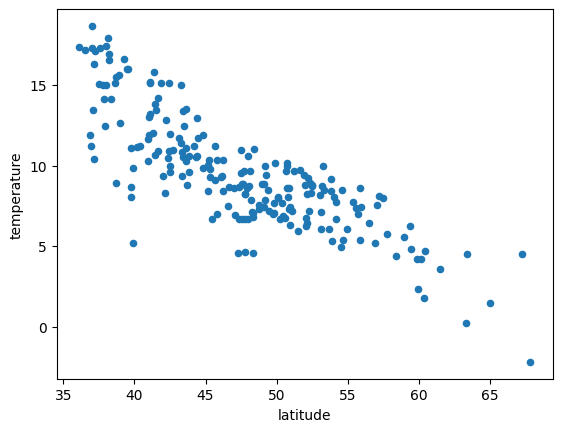

In [34]:
# Plotting
%matplotlib inline
cities.plot.scatter(x='latitude', y='temperature')

In [35]:
# Add fahrenheit column
cities['fahrenheit'] = (cities.temperature * 9/5) + 32
cities

,city,country,latitude,longitude,temperature,fahrenheit
0,Aalborg,Denmark,57.03,9.92,7.52,45.536
1,Aberdeen,United Kingdom,57.17,-2.08,8.10,46.580
2,Abisko,Sweden,63.35,18.83,0.20,32.360
3,Adana,Turkey,36.99,35.32,18.67,65.606
4,Albacete,Spain,39.00,-1.87,12.62,54.716
...,...,...,...,...,...,...
208,Yevpatoriya,Ukraine,45.20,33.36,10.02,50.036
209,Zaragoza,Spain,41.65,-0.89,14.17,57.506
210,Zhytomyr,Ukraine,50.25,28.66,6.67,44.006
211,Zonguldak,Turkey,41.43,31.78,10.64,51.152


In [36]:
# Sometimes temporary dataframe is needed
# Cities with latitude > 50 not in the EU (error then fix)
cities.merge(countries, on='country')[(cities.latitude > 50) & (countries.EU == 'no')]

,city,country,latitude,longitude,temperature,fahrenheit,population,EU,coastline
0,Aalborg,Denmark,57.03,9.92,7.52,45.536,5.69,yes,yes
1,Odense,Denmark,55.40,10.38,7.73,45.914,5.69,yes,yes
27,Edirne,Turkey,41.67,26.57,10.90,51.620,79.62,no,yes
29,Erzurum,Turkey,39.92,41.29,5.17,41.306,79.62,no,yes
33,Karaman,Turkey,37.18,33.22,10.41,50.738,79.62,no,yes
40,Sivas,Turkey,39.75,37.03,8.05,46.490,79.62,no,yes


In [37]:
# Notebook only displays result of last line
# Before last line need to use print
cities[cities.longitude > 35]
cities[cities.longitude < -5]

,city,country,latitude,longitude,temperature,fahrenheit
5,Algeciras,Spain,36.13,-5.47,17.38,63.284
17,Badajoz,Spain,38.88,-6.97,15.61,60.098
24,Belfast,United Kingdom,54.60,-5.96,8.48,47.264
42,Braga,Portugal,41.55,-8.42,13.42,56.156
67,Cork,Ireland,51.90,-8.50,9.41,48.938
74,Dublin,Ireland,53.33,-6.25,8.49,47.282
88,Galway,Ireland,53.27,-9.05,10.00,50.000
103,Huelva,Spain,37.25,-6.93,17.09,62.762
126,Lisbon,Portugal,38.72,-9.14,15.52,59.936
155,Oviedo,Spain,43.35,-5.83,10.85,51.530


### <font color="green">Your Turn: World Cup data</font>

In [38]:
# Read the Players and Teams data into dataframes
f = open('Players.csv',newline='')
players = pd.read_csv(f)
f = open('Teams.csv',newline='')
teams = pd.read_csv(f)


In [39]:
# What player on a team with “ia” in the team name played less than
# 200 minutes and made more than 100 passes? Print the player surname.

# Your code here
players.merge(teams, on = 'team')
tmp = players[players.team.str.contains('ia')]
tmp1 = tmp[(players.minutes < 200) & (players.passes > 100)]
tmp1.surname

/var/folders/yy/022mp9b51tj6_r6xgtwslfgc0000gn/T/ipykernel_9276/2933892410.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp1 = tmp[(players.minutes < 200) & (players.passes > 100)]


431    Kuzmanovic
Name: surname, dtype: object

In [147]:
# What is the average number of passes made by forwards? By midfielders?
# Make sure the answer specifies which is which, and don't include other
# positions in your result.

# Your code here
# tmp = countries[(countries.EU == 'no') & (countries.coastline == 'no')]
# tmp1 = tmp[['population']]
# tmp2 = tmp1.sort_values('population')
# tmp2

# print('Using built-in mean:', cities.temperature.mean())

players.merge(teams, on = 'team')
print('Average forwards passes: ', players[(players.position == 'forward')].passes.mean())
print('Average midfielders passes: ', players[(players.position == 'midfielder')].passes.mean())


Average forwards passes:  50.82517482517483
Average midfielders passes:  95.2719298245614


In [44]:
# Which team has the highest ratio of goalsFor to goalsAgainst?
# Print the team name only.
# Hint: Add a "ratio" column to the teams dataframe, then sort,
# then use head(1) or tail(1) depending how you sorted

# Your code here
teams.ratio = teams.goalsFor / teams.goalsAgainst
teams.head(1).team

0    Brazil
Name: team, dtype: object

In [45]:
# How many players who play on a team with ranking <10 played
# more than 350 minutes?
# Reminder: len() gives number of rows in a dataframe

# Your code here
len(players[(players['minutes'] > 350)].merge(teams[(teams['ranking'] < 10)], on = 'team'))

54

In [50]:
# BONUS!
# Write a loop that interactively asks the user to enter a team name.
# If the team exists, list all of the players on that team
# (with all of their information), sorted by descending minutes played.
# If the team doesn't exist, print "Team not in 2010 World Cup".
# If 'quit' is entered, terminate the loop.
# Reminder: To read a string from the user instead of a number, use
# raw_input() instead of input()
# Note: To test if a value v is (not) in a column c of a dataframe D,
# use "v (not) in D.c.values"

# Your code here
while True:
    name = input()
    if name == 'quit':
        break
    if name in players['team'].values:
        print(players[(players['team'] == name)].sort_values('minutes', ascending=[False]))
    if name not in players['team'].values:
        print('Team not in 2010 World Cup')

Team not in 2010 World Cup
         surname    team    position  minutes  shots  passes  tackles  saves
166       Lloris  France  goalkeeper      270      0      43        0     12
169        Sagna  France    defender      270      0     125        4      0
168       Ribery  France  midfielder      270      4     104        9      0
161       Gallas  France    defender      270      0      96        2      0
155   Abou Diaby  France  midfielder      270      1     111        5      0
154       Abidal  France    defender      180      0      91        6      0
171     Toulalan  France  midfielder      180      1      98        9      0
160         Evra  France    defender      180      0      92        4      0
164        Govou  France     forward      162      1      35        4      0
167      Malouda  France  midfielder      150      4      76        1      0
157       Anelka  France     forward      117      7      37        1      0
163     Gourcuff  France  midfielder      100    

### <font color="green">Your Turn: Arctic Data</font>

In [53]:
# Load the arctic dataset and answer the following questions using pandas
# 1. For the entire data set, find the maximum and minimum values
# 2. Find the maximum and minimum values for 2012
# 3. Find the maximum and the minimum in January of 2005.
# 4. Find the decadal average for each day in June from 2002 to 2012.
# 5. Find the average values for each month in 2011.

# Your code here
f = open('ArcticData.csv', newline = '')
arctic = pd.read_csv(f)

In [55]:
# 1. For the entire data set, find the maximum and minimum values
print(arctic.max().max())
print(arctic.min().min())

15602024
-9999


In [57]:
# 2. Find the maximum and minimum values for 2012
print(arctic['2012'].max())
print(arctic['2012'].min())

14709086
3177455


In [59]:
# 3. Find the maximum and the minimum in January of 2005.
tmp = arctic['2005'][(arctic['Month'] == 1)]
print(tmp.max())
print(tmp.min())

13601280
12573869


In [60]:
# 4. Find the decadal average for each day in June from 2002 to 2012.
import numpy as np

tmp = arctic[(arctic.Month == 7)]
tmp1 = tmp.iloc[:, 5:16].mean(axis = 1).astype(np.int64)
tmp1

182    9535527
183    9449215
184    9368054
185    9287244
186    9198209
187    9108613
188    9029230
189    8940839
190    8848599
191    8755069
192    8671662
193    8582690
194    8499594
195    8410306
196    8326881
197    8244256
198    8156020
199    8061929
200    7969914
201    7880248
202    7789058
203    7692375
204    7598099
205    7491288
206    7420015
207    7343130
208    7254139
209    7167470
210    7096494
211    6330867
212    6265545
dtype: int64

### <font color="purple">Further reading and additional tutorials</font>
Quick overview on pandas library
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min

Additional questions to play 
https://www.machinelearningplus.com/python/101-pandas-exercises-python/